# Main

In [1]:
cts_file <- "/data/BIDS-HPC/private/projects/dmi2/data/gene_counts.tsv"
anno_file <- "/data/BIDS-HPC/private/projects/dmi2/data/annotation.csv"
cts <- as.matrix(read.csv(cts_file, sep="\t", row.names="gene_id"))
coldata <- read.csv(anno_file, row.names=1)
coldata$condition <- gsub("-", "_", coldata$condition)
coldata$condition <- gsub(",", ".", coldata$condition)
coldata$condition <- gsub(" ", "", coldata$condition)
coldata$condition <- factor(coldata$condition)
rownames(coldata) <- gsub("-", "_", rownames(coldata))
colnames(cts) <- gsub("\\.", "_", colnames(cts))
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [5]:
library("DESeq2")
dds <- DESeqDataSetFromMatrix(countData = cts, colData = coldata, design = ~ condition)

In [7]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1758 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [8]:
vsd <- vst(dds, blind=FALSE)
rld <- rlog(dds, blind=FALSE)
ntd <- normTransform(dds) # note no blind option; this does log2(count(dds,normalized=TRUE) + 1)

In [11]:
all(assay(dds) == counts(dds))
all(log2(counts(dds, normalized=TRUE)+1) == assay(ntd))

[1] TRUE

[1] TRUE

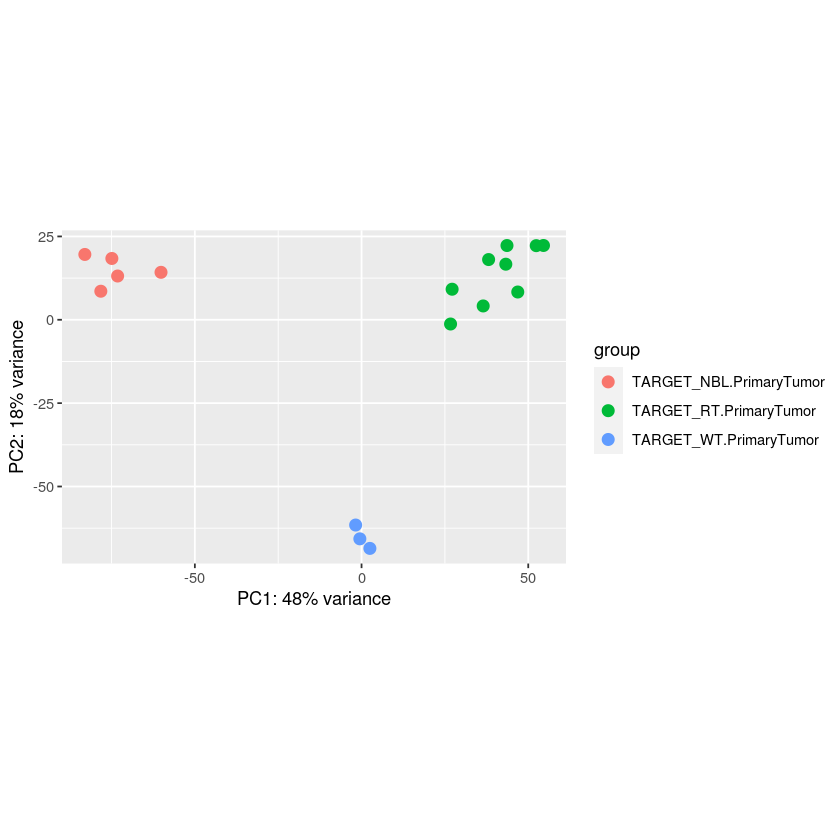

In [12]:
plotPCA(vsd, intgroup="condition")

# Scratch

In [10]:
x <- 4
x <- y
y <- 5
x

[1] 5

In [2]:
x

[1] 4

In [ ]:
# ME

dds <- DESeqDataSetFromMatrix(countData = cts, colData = coldata, design = ~ condition)

design(dds) <- ~ 1 # WHY?!?!

# learn the dispersion function of a dataset
dds <- estimateSizeFactors(dds)
dds <- estimateDispersions(dds)

# VST

# use the previous dispersion function for a new sample
ddsNew <- makeExampleDESeqDataSet(m=1)
ddsNew <- estimateSizeFactors(ddsNew)
dispersionFunction(ddsNew) <- dispersionFunction(dds)
vsdNew <- varianceStabilizingTransformation(ddsNew, blind=FALSE)


# RLOG

# run the rlog transformation on one dataset
rld <- rlog(dds, blind=FALSE)

# apply the parameters to a new sample

ddsNew <- makeExampleDESeqDataSet(m=1)
mcols(ddsNew)$dispFit <- mcols(dds)$dispFit
betaPriorVar <- attr(rld,"betaPriorVar")
intercept <- mcols(rld)$rlogIntercept
rldNew <- rlog(ddsNew, blind=FALSE,
               intercept=intercept,
               betaPriorVar=betaPriorVar)

In [ ]:
# Backup

# VST

dds <- makeExampleDESeqDataSet(m=6)
vsd <- varianceStabilizingTransformation(dds)
dists <- dist(t(assay(vsd)))
plot(hclust(dists))

# learn the dispersion function of a dataset
design(dds) <- ~ 1
dds <- estimateSizeFactors(dds)
dds <- estimateDispersions(dds)

# use the previous dispersion function for a new sample
ddsNew <- makeExampleDESeqDataSet(m=1)
ddsNew <- estimateSizeFactors(ddsNew)
dispersionFunction(ddsNew) <- dispersionFunction(dds)
vsdNew <- varianceStabilizingTransformation(ddsNew, blind=FALSE)


# RLOG

dds <- makeExampleDESeqDataSet(m=6,betaSD=1)
rld <- rlog(dds)
dists <- dist(t(assay(rld)))
plot(hclust(dists))

# run the rlog transformation on one dataset
design(dds) <- ~ 1
dds <- estimateSizeFactors(dds)
dds <- estimateDispersions(dds)
rld <- rlog(dds, blind=FALSE)

# apply the parameters to a new sample

ddsNew <- makeExampleDESeqDataSet(m=1)
mcols(ddsNew)$dispFit <- mcols(dds)$dispFit
betaPriorVar <- attr(rld,"betaPriorVar")
intercept <- mcols(rld)$rlogIntercept
rldNew <- rlog(ddsNew, blind=FALSE,
               intercept=intercept,
               betaPriorVar=betaPriorVar)

In [24]:
?makeExampleDESeqDataSet

makeExampleDESeqDataSet         package:DESeq2         R Documentation

_M_a_k_e _a _s_i_m_u_l_a_t_e_d _D_E_S_e_q_D_a_t_a_S_e_t

_D_e_s_c_r_i_p_t_i_o_n:

     Constructs a simulated dataset of Negative Binomial data from two
     conditions. By default, there are no fold changes between the two
     conditions, but this can be adjusted with the ‘betaSD’ argument.

_U_s_a_g_e:

     makeExampleDESeqDataSet(n = 1000, m = 12, betaSD = 0,
       interceptMean = 4, interceptSD = 2, dispMeanRel = function(x) 4/x +
       0.1, sizeFactors = rep(1, m))
     
_A_r_g_u_m_e_n_t_s:

       n: number of rows

       m: number of columns

  betaSD: the standard deviation for non-intercept betas, i.e. beta ~
          N(0,betaSD)

interceptMean: the mean of the intercept betas (log2 scale)

interceptSD: the standard deviation of the intercept betas (log2 scale)

dispMeanRel: a function specifying the relationship of the dispersions
          on ‘2^tr

In [16]:
?varianceStabilizingTransformation

varianceStabilizingTransformation    package:DESeq2    R Documentation

_A_p_p_l_y _a _v_a_r_i_a_n_c_e _s_t_a_b_i_l_i_z_i_n_g _t_r_a_n_s_f_o_r_m_a_t_i_o_n (_V_S_T) _t_o _t_h_e _c_o_u_n_t _d_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     This function calculates a variance stabilizing transformation
     (VST) from the fitted dispersion-mean relation(s) and then
     transforms the count data (normalized by division by the size
     factors or normalization factors), yielding a matrix of values
     which are now approximately homoskedastic (having constant
     variance along the range of mean values). The transformation also
     normalizes with respect to library size. The ‘rlog’ is less
     sensitive to size factors, which can be an issue when size factors
     vary widely. These transformations are useful when checking for
     outliers or as input for machine learning techniques such as
     clustering or linear discriminan

In [15]:
?normTransform

normTransform              package:DESeq2              R Documentation

_N_o_r_m_a_l_i_z_e_d _c_o_u_n_t_s _t_r_a_n_s_f_o_r_m_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     A simple function for creating a ‘DESeqTransform’ object after
     applying: ‘f(count(dds,normalized=TRUE) + pc)’.

_U_s_a_g_e:

     normTransform(object, f = log2, pc = 1)
     
_A_r_g_u_m_e_n_t_s:

  object: a DESeqDataSet object

       f: a function to apply to normalized counts

      pc: a pseudocount to add to normalized counts

_S_e_e _A_l_s_o:

     ‘varianceStabilizingTransformation’, ‘rlog’


In [13]:
?vst

vst                   package:DESeq2                   R Documentation

_Q_u_i_c_k_l_y _e_s_t_i_m_a_t_e _d_i_s_p_e_r_s_i_o_n _t_r_e_n_d _a_n_d _a_p_p_l_y _a _v_a_r_i_a_n_c_e _s_t_a_b_i_l_i_z_i_n_g
_t_r_a_n_s_f_o_r_m_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     This is a wrapper for the ‘varianceStabilizingTransformation’
     (VST) that provides much faster estimation of the dispersion trend
     used to determine the formula for the VST. The speed-up is
     accomplished by subsetting to a smaller number of genes in order
     to estimate this dispersion trend. The subset of genes is chosen
     deterministically, to span the range of genes' mean normalized
     count. This wrapper for the VST is not blind to the experimental
     design: the sample covariate information is used to estimate the
     global trend of genes' dispersion values over the genes' mean
     normalized count. It can be made strictly 

In [8]:
?rlog

rlog                  package:DESeq2                   R Documentation

_A_p_p_l_y _a '_r_e_g_u_l_a_r_i_z_e_d _l_o_g' _t_r_a_n_s_f_o_r_m_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     This function transforms the count data to the log2 scale in a way
     which minimizes differences between samples for rows with small
     counts, and which normalizes with respect to library size. The
     rlog transformation produces a similar variance stabilizing effect
     as ‘varianceStabilizingTransformation’, though ‘rlog’ is more
     robust in the case when the size factors vary widely. The
     transformation is useful when checking for outliers or as input
     for machine learning techniques such as clustering or linear
     discriminant analysis. ‘rlog’ takes as input a ‘DESeqDataSet’ and
     returns a ‘RangedSummarizedExperiment’ object.

_U_s_a_g_e:

     rlog(object, blind = TRUE, intercept, betaPriorVar,
       fitType = "parametric")
     


In [14]:
?varianceStabilizingTransformation

varianceStabilizingTransformation    package:DESeq2    R Documentation

_A_p_p_l_y _a _v_a_r_i_a_n_c_e _s_t_a_b_i_l_i_z_i_n_g _t_r_a_n_s_f_o_r_m_a_t_i_o_n (_V_S_T) _t_o _t_h_e _c_o_u_n_t _d_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     This function calculates a variance stabilizing transformation
     (VST) from the fitted dispersion-mean relation(s) and then
     transforms the count data (normalized by division by the size
     factors or normalization factors), yielding a matrix of values
     which are now approximately homoskedastic (having constant
     variance along the range of mean values). The transformation also
     normalizes with respect to library size. The ‘rlog’ is less
     sensitive to size factors, which can be an issue when size factors
     vary widely. These transformations are useful when checking for
     outliers or as input for machine learning techniques such as
     clustering or linear discriminan

In [21]:
?nbinomWaldTest

nbinomWaldTest             package:DESeq2              R Documentation

_W_a_l_d _t_e_s_t _f_o_r _t_h_e _G_L_M _c_o_e_f_f_i_c_i_e_n_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     This function tests for significance of coefficients in a Negative
     Binomial GLM, using previously calculated ‘sizeFactors’ (or
     ‘normalizationFactors’) and dispersion estimates.  See ‘DESeq’ for
     the GLM formula.

_U_s_a_g_e:

     nbinomWaldTest(object, betaPrior = FALSE, betaPriorVar,
       modelMatrix = NULL, modelMatrixType, betaTol = 1e-08, maxit = 100,
       useOptim = TRUE, quiet = FALSE, useT = FALSE, df, useQR = TRUE,
       minmu = 0.5)
     
_A_r_g_u_m_e_n_t_s:

  object: a DESeqDataSet

betaPrior: whether or not to put a zero-mean normal prior on the
          non-intercept coefficients

betaPriorVar: a vector with length equal to the number of model terms
          including the intercept. betaPriorVar gives the variance of
          the pri

In [17]:
?DESeq

DESeq                  package:DESeq2                  R Documentation

_D_i_f_f_e_r_e_n_t_i_a_l _e_x_p_r_e_s_s_i_o_n _a_n_a_l_y_s_i_s _b_a_s_e_d _o_n _t_h_e _N_e_g_a_t_i_v_e _B_i_n_o_m_i_a_l (_a._k._a.
_G_a_m_m_a-_P_o_i_s_s_o_n) _d_i_s_t_r_i_b_u_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     This function performs a default analysis through the steps:

       1. estimation of size factors: ‘estimateSizeFactors’

       2. estimation of dispersion: ‘estimateDispersions’

       3. Negative Binomial GLM fitting and Wald statistics:
          ‘nbinomWaldTest’

     For complete details on each step, see the manual pages of the
     respective functions. After the ‘DESeq’ function returns a
     DESeqDataSet object, results tables (log2 fold changes and
     p-values) can be generated using the ‘results’ function. Shrunken
     LFC can then be generated using the ‘lfcShrink’ function.  All
     support q

In [15]:
as.data.frame(colData(dds))

,condition,sizeFactor,replaceable
,<fct>,<dbl>,<lgl>
TARGET_30_PAIFXV_01A,TARGET_NBL.PrimaryTumor,1.2372001,FALSE
TARGET_30_PAIPGU_01A,TARGET_NBL.PrimaryTumor,0.8813045,FALSE
TARGET_30_PAISNS_01A,TARGET_NBL.PrimaryTumor,0.6737502,FALSE
TARGET_30_PAITCI_01A,TARGET_NBL.PrimaryTumor,1.0926209,FALSE
TARGET_30_PAITEG_01A,TARGET_NBL.PrimaryTumor,1.9712038,FALSE
TARGET_50_CAAAAB_01A,TARGET_WT.PrimaryTumor,1.1885311,FALSE
TARGET_50_CAAAAC_01A,TARGET_WT.PrimaryTumor,0.9903545,FALSE
TARGET_50_CAAAAH_01A,TARGET_WT.PrimaryTumor,0.9449081,FALSE
TARGET_52_PADWRZ_01A,TARGET_RT.PrimaryTumor,1.1392448,TRUE


In [14]:
sizeFactors(dds)

TARGET_30_PAIFXV_01A TARGET_30_PAIPGU_01A TARGET_30_PAISNS_01A 
           1.2372001            0.8813045            0.6737502 
TARGET_30_PAITCI_01A TARGET_30_PAITEG_01A TARGET_50_CAAAAB_01A 
           1.0926209            1.9712038            1.1885311 
TARGET_50_CAAAAC_01A TARGET_50_CAAAAH_01A TARGET_52_PADWRZ_01A 
           0.9903545            0.9449081            1.1392448 
TARGET_52_PADYCE_01A TARGET_52_PAEHIP_01A TARGET_52_PAJLRA_01A 
           0.9331619            0.8857373            1.4541221 
TARGET_52_PAJLWM_01A TARGET_52_PAJMBW_01A TARGET_52_PAJMRB_01A 
           0.8745608            0.7476986            0.7434300 
TARGET_52_PAJNER_01A TARGET_52_PAJNFP_01A 
           1.1219664            0.9085201

In [13]:
mcols(mcols(dds), use.names=TRUE)

DataFrame with 27 rows and 2 columns
                     type                                   description
              <character>                                   <character>
baseMean     intermediate     mean of normalized counts for all samples
baseVar      intermediate variance of normalized counts for all samples
allZero      intermediate                all counts for a gene are zero
dispGeneEst  intermediate             gene-wise estimates of dispersion
dispGeneIter intermediate            number of iterations for gene-wise
...                   ...                                           ...
betaConv          results                          convergence of betas
betaIter          results                          iterations for betas
deviance          results                 deviance for the fitted model
maxCooks          results               maximum Cook's distance for row
replace      intermediate                           had counts replaced

In [12]:
mcols(dds,use.names=TRUE)

DataFrame with 53413 rows and 27 columns
                            baseMean          baseVar   allZero
                           <numeric>        <numeric> <logical>
ENSG00000000003.13   4759.6078112327 33184019.6099706     FALSE
ENSG00000000005.5   48.2658784677006 7615.10273335655     FALSE
ENSG00000000419.11  3175.96538484157 3192038.38453762     FALSE
ENSG00000000457.12  795.117364929284 406128.720133303     FALSE
ENSG00000000460.15  825.100346271526  903388.25041123     FALSE
...                              ...              ...       ...
ENSG00000281909.1  0.835219689753507 5.21038621663897     FALSE
ENSG00000281910.1   1.29964885468171  4.1369905959155     FALSE
ENSG00000281912.1    53.556843621376 1056.89341101853     FALSE
ENSG00000281918.1   31.1811886870954 2663.11253866701     FALSE
ENSG00000281920.1   23.7618047112394 305.413724461116     FALSE
                         dispGeneEst dispGeneIter           dispFit
                           <numeric>    <numeric>         <

In [10]:
log2(count(dds,normalized=TRUE) + 1)

ERROR: Error in count(dds, normalized = TRUE): Argument 'x' must be a vector: S4


In [9]:
?count

rowCounts             package:matrixStats              R Documentation

_C_o_u_n_t_s _t_h_e _n_u_m_b_e_r _o_f _o_c_c_u_r_r_e_n_c_e_s _o_f _a _s_p_e_c_i_f_i_c _v_a_l_u_e

_D_e_s_c_r_i_p_t_i_o_n:

     The row- and column-wise functions take either a matrix or a
     vector as input. If a vector, then argument ‘dim.’ must be
     specified and fulfill ‘prod(dim.) == length(x)’.  The result will
     be identical to the results obtained when passing ‘matrix(x, nrow
     = dim.[1L], ncol = dim.[2L])’, but avoids having to temporarily
     create/allocate a matrix, if only such is needed only for these
     calculations.

_U_s_a_g_e:

     rowCounts(
       x,
       rows = NULL,
       cols = NULL,
       value = TRUE,
       na.rm = FALSE,
       dim. = dim(x),
       ...
     )
     
     colCounts(
       x,
       rows = NULL,
       cols = NULL,
       value = TRUE,
       na.rm = FALSE,
       dim. = dim(x),
       ...
     

In [6]:
?normTransform

normTransform              package:DESeq2              R Documentation

_N_o_r_m_a_l_i_z_e_d _c_o_u_n_t_s _t_r_a_n_s_f_o_r_m_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     A simple function for creating a ‘DESeqTransform’ object after
     applying: ‘f(count(dds,normalized=TRUE) + pc)’.

_U_s_a_g_e:

     normTransform(object, f = log2, pc = 1)
     
_A_r_g_u_m_e_n_t_s:

  object: a DESeqDataSet object

       f: a function to apply to normalized counts

      pc: a pseudocount to add to normalized counts

_S_e_e _A_l_s_o:

     ‘varianceStabilizingTransformation’, ‘rlog’


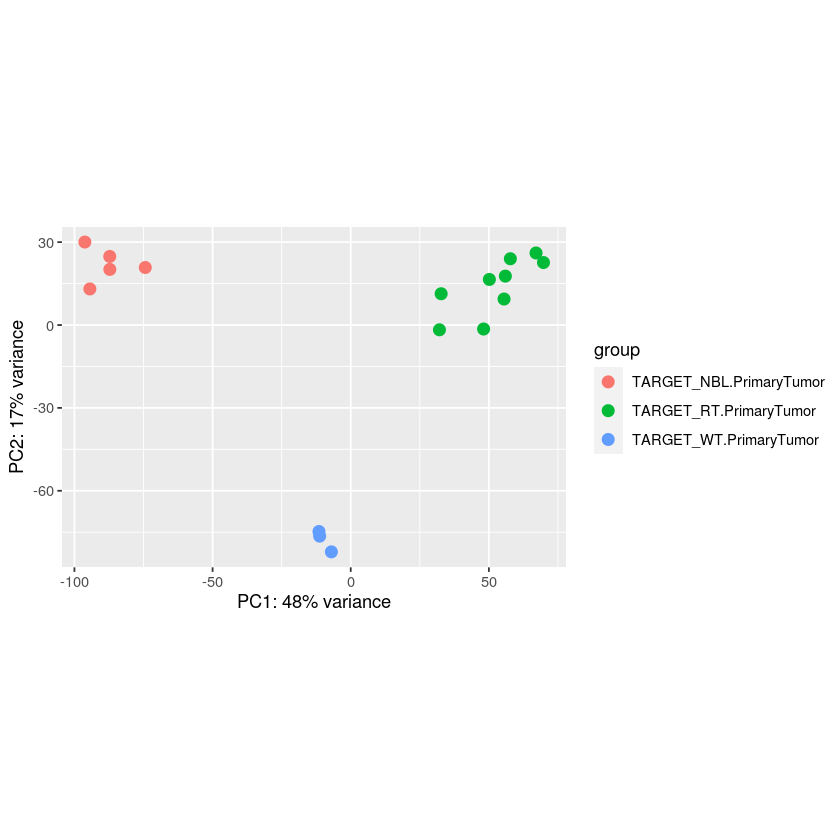

In [20]:
plotPCA(ntd, intgroup="condition")

In [39]:
?vst

vst                   package:DESeq2                   R Documentation

_Q_u_i_c_k_l_y _e_s_t_i_m_a_t_e _d_i_s_p_e_r_s_i_o_n _t_r_e_n_d _a_n_d _a_p_p_l_y _a _v_a_r_i_a_n_c_e _s_t_a_b_i_l_i_z_i_n_g
_t_r_a_n_s_f_o_r_m_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     This is a wrapper for the ‘varianceStabilizingTransformation’
     (VST) that provides much faster estimation of the dispersion trend
     used to determine the formula for the VST. The speed-up is
     accomplished by subsetting to a smaller number of genes in order
     to estimate this dispersion trend. The subset of genes is chosen
     deterministically, to span the range of genes' mean normalized
     count. This wrapper for the VST is not blind to the experimental
     design: the sample covariate information is used to estimate the
     global trend of genes' dispersion values over the genes' mean
     normalized count. It can be made strictly 

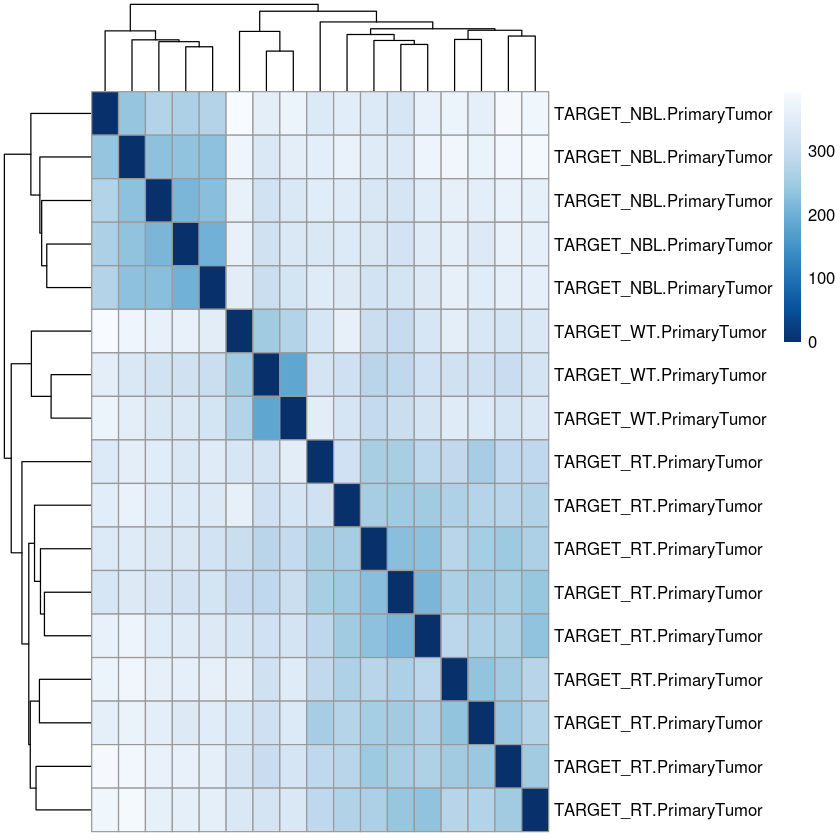

In [13]:
vsd_blind <- vst(dds, blind=TRUE)
#vsd2use <- vsd_blind
vsd2use <- vsd
sampleDists <- dist(t(assay(vsd2use)))
library("RColorBrewer")
library("pheatmap")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- vsd2use$condition # paste(vsd2use$condition, vsd2use$type, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

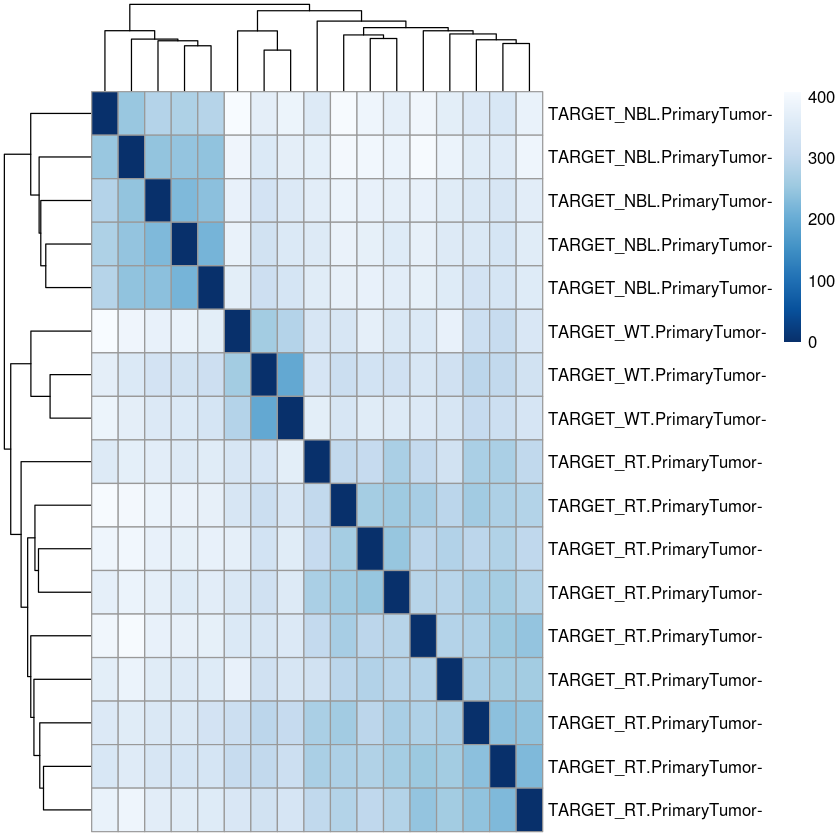

In [11]:
vsd_blind <- vst(dds, blind=TRUE)
vsd2use <- vsd_blind
#vsd2use <- vsd
sampleDists <- dist(t(assay(vsd2use)))
library("RColorBrewer")
library("pheatmap")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd2use$condition, vsd2use$type, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

In [3]:
dds

class: DESeqDataSet 
dim: 53413 17 
metadata(1): version
assays(1): counts
rownames(53413): ENSG00000000003.13 ENSG00000000005.5 ...
  ENSG00000281918.1 ENSG00000281920.1
rowData names(0):
colnames(17): TARGET_30_PAIFXV_01A TARGET_30_PAIPGU_01A ...
  TARGET_52_PAJNER_01A TARGET_52_PAJNFP_01A
colData names(1): condition

In [5]:
coldata

,condition
,<fct>
TARGET_30_PAIFXV_01A,TARGET_NBL.PrimaryTumor
TARGET_30_PAIPGU_01A,TARGET_NBL.PrimaryTumor
TARGET_30_PAISNS_01A,TARGET_NBL.PrimaryTumor
TARGET_30_PAITCI_01A,TARGET_NBL.PrimaryTumor
TARGET_30_PAITEG_01A,TARGET_NBL.PrimaryTumor
TARGET_50_CAAAAB_01A,TARGET_WT.PrimaryTumor
TARGET_50_CAAAAC_01A,TARGET_WT.PrimaryTumor
TARGET_50_CAAAAH_01A,TARGET_WT.PrimaryTumor
TARGET_52_PADWRZ_01A,TARGET_RT.PrimaryTumor


In [7]:
dds$condition

[1] TARGET_NBL.PrimaryTumor TARGET_NBL.PrimaryTumor TARGET_NBL.PrimaryTumor
 [4] TARGET_NBL.PrimaryTumor TARGET_NBL.PrimaryTumor TARGET_WT.PrimaryTumor 
 [7] TARGET_WT.PrimaryTumor  TARGET_WT.PrimaryTumor  TARGET_RT.PrimaryTumor 
[10] TARGET_RT.PrimaryTumor  TARGET_RT.PrimaryTumor  TARGET_RT.PrimaryTumor 
[13] TARGET_RT.PrimaryTumor  TARGET_RT.PrimaryTumor  TARGET_RT.PrimaryTumor 
[16] TARGET_RT.PrimaryTumor  TARGET_RT.PrimaryTumor 
3 Levels: TARGET_NBL.PrimaryTumor ... TARGET_WT.PrimaryTumor

In [8]:
dds

class: DESeqDataSet 
dim: 53413 17 
metadata(1): version
assays(1): counts
rownames(53413): ENSG00000000003.13 ENSG00000000005.5 ...
  ENSG00000281918.1 ENSG00000281920.1
rowData names(0):
colnames(17): TARGET_30_PAIFXV_01A TARGET_30_PAIPGU_01A ...
  TARGET_52_PAJNER_01A TARGET_52_PAJNFP_01A
colData names(1): condition

In [9]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1758 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [10]:
dds

class: DESeqDataSet 
dim: 53413 17 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(53413): ENSG00000000003.13 ENSG00000000005.5 ...
  ENSG00000281918.1 ENSG00000281920.1
rowData names(27): baseMean baseVar ... maxCooks replace
colnames(17): TARGET_30_PAIFXV_01A TARGET_30_PAIPGU_01A ...
  TARGET_52_PAJNER_01A TARGET_52_PAJNFP_01A
colData names(3): condition sizeFactor replaceable

In [11]:
res <- results(dds)

In [12]:
res

log2 fold change (MLE): condition TARGET WT.PrimaryTumor vs TARGET NBL.PrimaryTumor 
Wald test p-value: condition TARGET WT.PrimaryTumor vs TARGET NBL.PrimaryTumor 
DataFrame with 53413 rows and 6 columns
                            baseMean    log2FoldChange             lfcSE
                           <numeric>         <numeric>         <numeric>
ENSG00000000003.13   4759.6078112327  3.14153141821605 0.659213715470005
ENSG00000000005.5   48.2658784677006  1.61087916969592  1.47134381948108
ENSG00000000419.11  3175.96538484157  1.15986452488514 0.517747668096895
ENSG00000000457.12  795.117364929284  1.68254598940061 0.404136442987363
ENSG00000000460.15  825.100346271526  3.13450456575544 0.615846033659857
...                              ...               ...               ...
ENSG00000281909.1  0.835219689753507  3.78053115246825  2.44467725073362
ENSG00000281910.1   1.29964885468171  2.36644587415712  2.49384337222142
ENSG00000281912.1    53.556843621376  -1.4852207902339 0.59487047

In [17]:
res <- results(dds, contrast=c("condition","TARGET_WT.PrimaryTumor","TARGET_RT.PrimaryTumor"))
res

log2 fold change (MLE): condition TARGET_WT.PrimaryTumor vs TARGET_RT.PrimaryTumor 
Wald test p-value: condition TARGET_WT.PrimaryTumor vs TARGET_RT.PrimaryTumor 
DataFrame with 53413 rows and 6 columns
                            baseMean     log2FoldChange             lfcSE
                           <numeric>          <numeric>         <numeric>
ENSG00000000003.13   4759.6078112327   1.92672629026888 0.601660221440535
ENSG00000000005.5   48.2658784677006  -2.87300566121595  1.31509725816747
ENSG00000000419.11  3175.96538484157  0.623888736999692 0.472580451395422
ENSG00000000457.12  795.117364929284   1.69104934365436 0.368797984449854
ENSG00000000460.15  825.100346271526   2.38922117067502 0.561668293767052
...                              ...                ...               ...
ENSG00000281909.1  0.835219689753507   3.20961605578376  2.18581529700567
ENSG00000281910.1   1.29964885468171   -1.3493889808954  2.17475805883356
ENSG00000281912.1    53.556843621376 -0.713251266812177 0

In [19]:
?results

results                 package:DESeq2                 R Documentation

_E_x_t_r_a_c_t _r_e_s_u_l_t_s _f_r_o_m _a _D_E_S_e_q _a_n_a_l_y_s_i_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘results’ extracts a result table from a DESeq analysis giving
     base means across samples, log2 fold changes, standard errors,
     test statistics, p-values and adjusted p-values; ‘resultsNames’
     returns the names of the estimated effects (coefficents) of the
     model; ‘removeResults’ returns a ‘DESeqDataSet’ object with
     results columns removed.

_U_s_a_g_e:

     results(object, contrast, name, lfcThreshold = 0,
       altHypothesis = c("greaterAbs", "lessAbs", "greater", "less"),
       listValues = c(1, -1), cooksCutoff, independentFiltering = TRUE,
       alpha = 0.1, filter, theta, pAdjustMethod = "BH", filterFun,
       format = c("DataFrame", "GRanges", "GRangesList"), test,
       addMLE = FALSE, tidy = FALSE, parallel = FALSE,
       BPPARAM = 

In [20]:
summary(res)


out of 53400 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 4054, 7.6%
LFC < 0 (down)     : 3806, 7.1%
outliers [1]       : 853, 1.6%
low counts [2]     : 18600, 35%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [21]:
vsd <- vst(dds, blind=FALSE)
rld <- rlog(dds, blind=FALSE)

,TARGET_30_PAIFXV_01A,TARGET_30_PAIPGU_01A,TARGET_30_PAISNS_01A,TARGET_30_PAITCI_01A,TARGET_30_PAITEG_01A,TARGET_50_CAAAAB_01A,TARGET_50_CAAAAC_01A,TARGET_50_CAAAAH_01A,TARGET_52_PADWRZ_01A,TARGET_52_PADYCE_01A,TARGET_52_PAEHIP_01A,TARGET_52_PAJLRA_01A,TARGET_52_PAJLWM_01A,TARGET_52_PAJMBW_01A,TARGET_52_PAJMRB_01A,TARGET_52_PAJNER_01A,TARGET_52_PAJNFP_01A
ENSG00000000003.13,10.353925,10.069367,11.390602,10.459061,10.371801,13.114744,13.093392,14.510695,11.493477,11.19631,11.759544,13.576550,11.038726,11.732908,10.471985,11.567185,10.582720
ENSG00000000005.5,4.259371,4.571168,2.877369,2.877369,3.255359,4.210245,4.240989,5.099611,5.465863,3.42502,6.431738,8.385065,3.672117,5.222008,7.094941,7.686935,3.657481
ENSG00000000419.11,10.341396,10.660979,10.892637,11.943348,11.118600,11.748511,11.277565,13.093834,12.171048,10.69663,11.847034,11.074255,12.068290,10.941040,11.161516,11.886699,12.017740


In [22]:
vsd

class: DESeqTransform 
dim: 53413 17 
metadata(1): version
assays(1): ''
rownames(53413): ENSG00000000003.13 ENSG00000000005.5 ...
  ENSG00000281918.1 ENSG00000281920.1
rowData names(27): baseMean baseVar ... replace dispFit
colnames(17): TARGET_30_PAIFXV_01A TARGET_30_PAIPGU_01A ...
  TARGET_52_PAJNER_01A TARGET_52_PAJNFP_01A
colData names(3): condition sizeFactor replaceable

In [24]:
assay(rld)

,TARGET_30_PAIFXV_01A,TARGET_30_PAIPGU_01A,TARGET_30_PAISNS_01A,TARGET_30_PAITCI_01A,TARGET_30_PAITEG_01A,TARGET_50_CAAAAB_01A,TARGET_50_CAAAAC_01A,TARGET_50_CAAAAH_01A,TARGET_52_PADWRZ_01A,TARGET_52_PADYCE_01A,TARGET_52_PAEHIP_01A,TARGET_52_PAJLRA_01A,TARGET_52_PAJLWM_01A,TARGET_52_PAJMBW_01A,TARGET_52_PAJMRB_01A,TARGET_52_PAJNER_01A,TARGET_52_PAJNFP_01A
ENSG00000000003.13,10.622934,10.4086349,11.426650,10.7029931,10.6364495,12.817357,12.7997811,13.972950,11.507896,11.273854,11.719139,13.198871,11.150599,11.697920,10.712938,11.566261,10.797653
ENSG00000000005.5,3.048574,3.5149980,1.088829,0.7843819,0.9702553,2.970548,3.0233923,4.199754,4.625930,1.546191,5.625962,7.434731,2.034899,4.342386,6.257531,6.805362,2.001177
ENSG00000000419.11,10.583946,10.8291587,11.009039,11.8412990,11.1858389,11.685146,11.3110219,12.779756,12.024745,10.856723,11.764005,11.151035,11.941826,11.046799,11.219602,11.795818,11.901116
ENSG00000000457.12,9.156779,9.0174338,9.663143,9.3104012,8.7205935,10.191772,11.1630591,9.985124,8.827173,9.550046,9.393725,9.450727,8.946943,8.996412,8.851061,9.205084,9.385684
ENSG00000000460.15,7.751906,8.4748252,9.260091,8.3459302,7.3280806,10.433891,11.2538619,10.967961,9.032452,8.019280,8.935172,9.346720,9.332770,7.934406,8.111155,9.447993,9.508423
ENSG00000000938.11,7.843643,8.9485088,8.029493,6.8789805,11.7992458,5.606226,5.1161286,5.534008,5.887738,7.216164,7.196660,8.200148,5.500037,9.149315,9.011932,7.113173,6.726998
ENSG00000000971.14,10.579797,10.4912682,11.244383,11.4142742,13.0919699,9.816717,9.1116356,9.597127,9.258493,8.902671,11.111717,7.900899,8.223471,11.890457,14.414220,10.284383,8.959800
ENSG00000001036.12,10.937127,10.7705226,10.222473,10.7451393,12.2918002,11.675679,11.5713693,11.923876,13.004765,12.322960,12.075679,11.504133,13.172755,13.555789,13.283598,11.911722,12.399243
ENSG00000001084.9,10.003297,9.8105799,9.355761,10.1723384,10.3596443,10.404911,10.2225643,10.899467,10.169319,9.982712,10.584019,10.178749,10.441112,9.863412,9.847302,10.421217,10.779921
ENSG00000001167.13,10.252746,10.7876148,11.101880,10.4077734,10.3923702,12.374855,12.0960189,11.183580,11.672747,11.339988,12.212401,12.142975,10.803224,11.281487,11.064465,11.179657,11.155680


In [25]:
assay(vsd)

,TARGET_30_PAIFXV_01A,TARGET_30_PAIPGU_01A,TARGET_30_PAISNS_01A,TARGET_30_PAITCI_01A,TARGET_30_PAITEG_01A,TARGET_50_CAAAAB_01A,TARGET_50_CAAAAC_01A,TARGET_50_CAAAAH_01A,TARGET_52_PADWRZ_01A,TARGET_52_PADYCE_01A,TARGET_52_PAEHIP_01A,TARGET_52_PAJLRA_01A,TARGET_52_PAJLWM_01A,TARGET_52_PAJMBW_01A,TARGET_52_PAJMRB_01A,TARGET_52_PAJNER_01A,TARGET_52_PAJNFP_01A
ENSG00000000003.13,10.353925,10.069367,11.390602,10.459061,10.371801,13.114744,13.093392,14.510695,11.493477,11.196313,11.759544,13.576550,11.038726,11.732908,10.471985,11.567185,10.582720
ENSG00000000005.5,4.259371,4.571168,2.877369,2.877369,3.255359,4.210245,4.240989,5.099611,5.465863,3.425020,6.431738,8.385065,3.672117,5.222008,7.094941,7.686935,3.657481
ENSG00000000419.11,10.341396,10.660979,10.892637,11.943348,11.118600,11.748511,11.277565,13.093834,12.171048,10.696627,11.847034,11.074255,12.068290,10.941040,11.161516,11.886699,12.017740
ENSG00000000457.12,9.127680,8.953301,9.756719,9.319218,8.580666,10.405832,11.583619,10.153004,8.714587,9.616780,9.422852,9.493634,8.864916,8.926891,8.744384,9.187966,9.412857
ENSG00000000460.15,7.473009,8.381023,9.353845,8.220313,6.928387,10.781784,11.770347,11.424311,9.073143,7.810535,8.952865,9.460216,9.443158,7.702972,7.925667,9.584526,9.658618
ENSG00000000938.11,8.041333,9.349402,8.261688,6.911865,12.672866,5.507199,5.009196,5.428785,5.803816,7.303344,7.280532,8.463082,5.392189,9.586728,9.424536,7.183334,6.736712
ENSG00000000971.14,10.647946,10.537550,11.468231,11.675547,13.681641,9.686558,8.776971,9.405510,8.968308,8.503132,11.305619,7.165991,7.599440,12.252353,15.214150,10.278406,8.578130
ENSG00000001036.12,10.647220,10.426553,9.683085,10.392839,12.380803,11.603914,11.470612,11.918938,13.260650,12.419672,12.110217,11.384419,13.465394,13.928750,13.599990,11.903579,12.514628
ENSG00000001084.9,9.969180,9.725117,9.135147,10.181691,10.415863,10.472280,10.244616,11.083066,10.177905,9.943192,10.694674,10.189730,10.517348,9.792212,9.771760,10.492581,10.936336
ENSG00000001167.13,9.971505,10.668039,11.068448,10.175995,10.155911,12.648185,12.307324,11.171777,11.784444,11.368749,12.450012,12.364929,10.688049,11.295199,11.021035,11.166825,11.136527


In [5]:
log2(assay(dds)+1) # note: all(assay(dds) == counts(dds))

,TARGET_30_PAIFXV_01A,TARGET_30_PAIPGU_01A,TARGET_30_PAISNS_01A,TARGET_30_PAITCI_01A,TARGET_30_PAITEG_01A,TARGET_50_CAAAAB_01A,TARGET_50_CAAAAC_01A,TARGET_50_CAAAAH_01A,TARGET_52_PADWRZ_01A,TARGET_52_PADYCE_01A,TARGET_52_PAEHIP_01A,TARGET_52_PAJLRA_01A,TARGET_52_PAJLWM_01A,TARGET_52_PAJMBW_01A,TARGET_52_PAJMRB_01A,TARGET_52_PAJNER_01A,TARGET_52_PAJNFP_01A
ENSG00000000003.13,10.645658,9.868823,10.813781,10.572700,11.335390,13.361670,13.077150,14.428098,11.674634,11.088126,11.578844,14.115044,10.836050,11.307770,10.030667,11.726644,10.431498
ENSG00000000005.5,3.321928,3.459432,0.000000,0.000000,1.000000,3.169925,3.000000,4.392317,5.169925,1.000000,6.022368,8.864186,1.584963,4.247928,6.523562,7.754888,1.584963
ENSG00000000419.11,10.632995,10.466586,10.312883,12.066089,12.088457,11.991876,11.255619,13.009829,12.354800,10.584963,11.666668,11.605016,11.870365,10.511753,10.725366,12.047465,11.874597
ENSG00000000457.12,9.398744,8.731319,9.164907,9.415742,9.505812,10.640245,11.563196,10.053926,8.854868,9.491853,9.219169,10.005625,8.629357,8.467606,8.271463,9.319672,9.245553
ENSG00000000460.15,7.665336,8.139551,8.754888,8.280771,7.734710,11.019591,11.750707,11.335390,9.224002,7.622052,8.738092,9.971544,9.221587,7.189825,7.417853,9.724514,9.495855
ENSG00000000938.11,8.271463,9.136991,7.629357,6.870365,13.648807,5.285402,4.321928,4.857981,5.614710,7.076816,6.977280,8.945444,4.700440,9.142107,8.968667,7.209453,6.409391
ENSG00000000971.14,10.942515,10.342075,10.891784,11.797256,14.659160,9.911392,8.717676,9.294621,9.116344,8.348728,11.122828,7.562242,7.303781,11.828930,14.785912,10.428360,8.388017
ENSG00000001036.12,10.941781,10.230020,9.090112,10.505812,13.356039,11.846666,11.449665,11.832099,13.446696,12.316282,11.930737,11.916999,13.270295,13.508042,13.170708,12.064406,12.372865
ENSG00000001084.9,10.256209,9.519636,8.531381,10.292322,11.379920,10.707359,10.214319,10.992230,10.348728,9.823367,10.507795,10.712527,10.310613,9.350939,9.321928,10.644758,10.787903
ENSG00000001167.13,10.258566,10.473706,10.489848,10.286558,11.116994,12.894249,12.289443,11.081483,11.966866,11.261507,12.271463,12.901244,10.482808,10.868051,10.584023,11.324181,10.989394


In [7]:
ntd <- normTransform(dds)
assay(ntd)

,TARGET_30_PAIFXV_01A,TARGET_30_PAIPGU_01A,TARGET_30_PAISNS_01A,TARGET_30_PAITCI_01A,TARGET_30_PAITEG_01A,TARGET_50_CAAAAB_01A,TARGET_50_CAAAAC_01A,TARGET_50_CAAAAH_01A,TARGET_52_PADWRZ_01A,TARGET_52_PADYCE_01A,TARGET_52_PAEHIP_01A,TARGET_52_PAJLRA_01A,TARGET_52_PAJLWM_01A,TARGET_52_PAJMBW_01A,TARGET_52_PAJMRB_01A,TARGET_52_PAJNER_01A,TARGET_52_PAJNFP_01A
ENSG00000000003.13,10.338793,10.050927,11.383234,10.444995,10.3568556,13.112516,13.091131,14.509849,11.486617,11.187882,11.753840,13.574932,11.029321,11.727098,10.458044,11.5606664,10.569812
ENSG00000000005.5,3.048670,3.626067,0.000000,0.000000,0.5919706,2.950655,3.012243,4.470282,4.987417,1.050763,6.194879,8.325443,1.716711,4.648113,6.947264,7.5896725,1.678695
ENSG00000000419.11,10.326132,10.648753,10.882227,11.938327,11.1097018,11.742763,11.269596,13.091573,12.166761,10.684700,11.841666,11.065078,12.063686,10.930975,11.152879,11.8814769,12.012972
ENSG00000000457.12,9.092172,8.913204,9.733801,9.288144,8.5286607,10.391236,11.577175,10.135605,8.667224,9.591520,9.393941,9.466113,8.822269,8.886048,8.697996,9.1539181,9.383745
ENSG00000000460.15,7.359942,8.321231,9.323512,8.153407,6.7621959,10.770542,11.764686,11.417114,9.036260,7.721363,8.912755,9.432048,9.414653,7.606801,7.843417,9.5586924,9.634082
ENSG00000000938.11,7.965491,9.318974,8.196692,6.743713,12.6698391,5.043180,4.335215,4.936992,5.430726,7.175902,7.151020,8.406624,4.886832,9.560934,9.395659,7.0446124,6.546247
ENSG00000000971.14,10.635609,10.524230,11.461250,11.669501,13.6801370,9.662495,8.731626,9.376248,8.928628,8.448233,11.297803,7.025556,7.496004,12.248301,15.213630,10.2624584,8.526033
ENSG00000001036.12,10.634876,10.412165,9.658963,10.378110,12.3770960,11.597560,11.463643,11.913831,13.258636,12.416063,12.105744,11.377020,13.463646,13.927482,13.598399,11.8984176,12.511250
ENSG00000001084.9,9.949410,9.701690,9.099823,10.164635,10.4013686,10.458342,10.228290,11.073945,10.160804,9.923061,10.682731,10.172769,10.503840,9.769853,9.749081,10.4788381,10.926237
ENSG00000001167.13,9.951766,10.655873,11.059235,10.158872,10.1385475,12.645105,12.303423,11.163201,11.778838,11.361269,12.446479,12.361181,10.676051,11.287327,11.011513,11.1582198,11.127739


In [8]:
?normTransform

normTransform              package:DESeq2              R Documentation

_N_o_r_m_a_l_i_z_e_d _c_o_u_n_t_s _t_r_a_n_s_f_o_r_m_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     A simple function for creating a ‘DESeqTransform’ object after
     applying: ‘f(count(dds,normalized=TRUE) + pc)’.

_U_s_a_g_e:

     normTransform(object, f = log2, pc = 1)
     
_A_r_g_u_m_e_n_t_s:

  object: a DESeqDataSet object

       f: a function to apply to normalized counts

      pc: a pseudocount to add to normalized counts

_S_e_e _A_l_s_o:

     ‘varianceStabilizingTransformation’, ‘rlog’


In [9]:
?assay

SummarizedExperiment-classpackage:SummarizedExperiment R Documentation

_S_u_m_m_a_r_i_z_e_d_E_x_p_e_r_i_m_e_n_t _o_b_j_e_c_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The SummarizedExperiment class is a matrix-like container where
     rows represent features of interest (e.g. genes, transcripts,
     exons, etc...)  and columns represent samples (with sample data
     summarized as a DataFrame). A SummarizedExperiment object contains
     one or more assays, each represented by a matrix-like object of
     numeric or other mode.

     Note that SummarizedExperiment is the parent of the
     RangedSummarizedExperiment class which means that all the methods
     documented below also work on a RangedSummarizedExperiment object.

_U_s_a_g_e:

     ## Constructor
     
     # See ?RangedSummarizedExperiment for the constructor function.
     
     ## Accessors
     
     assayNames(x, ...)
     assayNames(x, ...) <- value
     assays(x, ..., withDimnames

In [24]:
install.packages("pheatmap")

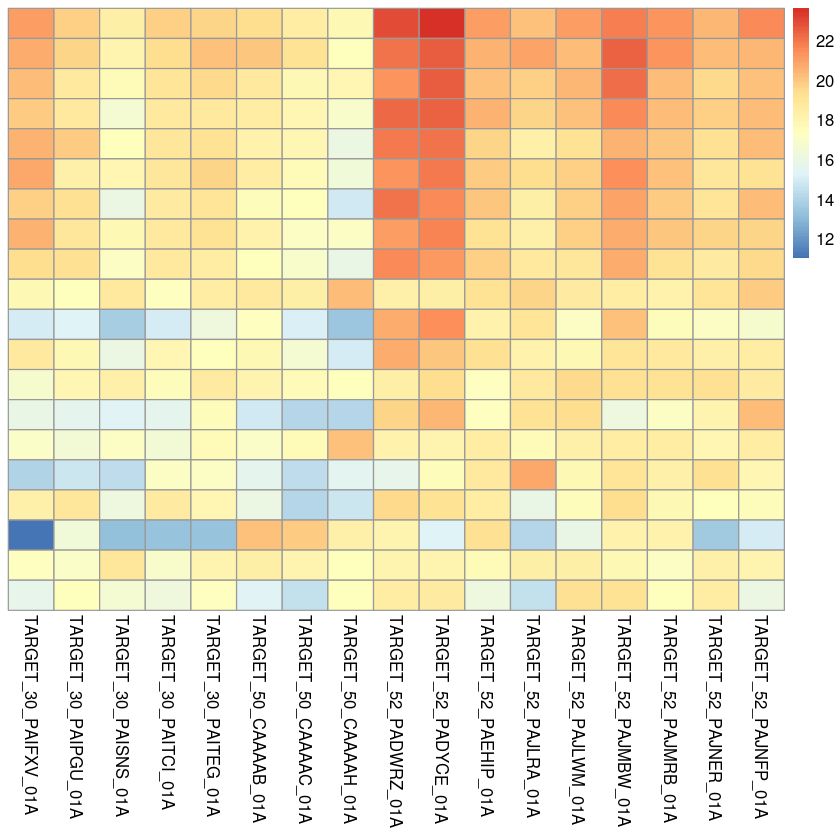

In [15]:
# all(assay(dds) == counts(dds))
# all(log2(counts(dds, normalized=TRUE)+1) == assay(ntd))
library("pheatmap")
select <- order(rowMeans(counts(dds,normalized=TRUE)), decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition")])
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=FALSE, cluster_cols=FALSE)

In [35]:
assay(ntd)[select,]

,TARGET_30_PAIFXV_01A,TARGET_30_PAIPGU_01A,TARGET_30_PAISNS_01A,TARGET_30_PAITCI_01A,TARGET_30_PAITEG_01A,TARGET_50_CAAAAB_01A,TARGET_50_CAAAAC_01A,TARGET_50_CAAAAH_01A,TARGET_52_PADWRZ_01A,TARGET_52_PADYCE_01A,TARGET_52_PAEHIP_01A,TARGET_52_PAJLRA_01A,TARGET_52_PAJLWM_01A,TARGET_52_PAJMBW_01A,TARGET_52_PAJMRB_01A,TARGET_52_PAJNER_01A,TARGET_52_PAJNFP_01A
ENSG00000198886.2,21.04842,19.81020,18.38956,19.78171,19.70152,19.45698,18.52361,17.70546,22.93081,23.64932,21.08882,20.20991,21.10471,21.78153,21.36619,20.45459,21.59351
ENSG00000198804.2,20.68508,19.61577,17.98975,19.43857,20.11307,20.02524,19.22150,17.43466,22.06579,22.58744,20.59230,20.91099,20.35284,22.43797,21.27053,20.28957,20.47964
ENSG00000198938.2,20.33412,18.73142,17.58337,19.03646,19.55686,18.79115,17.79580,17.88323,21.28237,22.62753,20.11504,19.83605,20.48318,22.19377,20.32424,19.49579,20.12288
ENSG00000198727.2,19.87968,18.73249,16.60390,18.78570,18.72315,18.50162,17.85340,16.93989,22.30205,22.49857,20.52411,19.71974,20.12874,21.61095,20.32089,19.74373,20.32448
ENSG00000198763.3,20.60540,19.92118,17.41896,18.95098,19.18776,18.18997,17.88769,15.98883,21.92057,22.04770,19.72532,18.24627,19.19045,20.61209,20.07926,19.24358,20.25363
ENSG00000210082.2,20.82348,18.32854,17.88241,18.88716,19.68572,18.52272,17.63338,16.38257,21.27879,21.96929,19.95386,19.38755,19.74219,21.42588,20.19334,18.87032,19.14120
ENSG00000198888.2,19.84824,19.30715,16.01070,18.66490,19.03518,17.55727,17.45010,14.80840,22.08470,21.60568,20.01504,18.36746,19.72992,20.93606,19.97808,18.99949,20.32758
ENSG00000198712.1,20.50197,18.89774,17.82880,18.81511,19.14246,18.10768,17.14428,17.08513,21.01575,21.64217,19.13946,18.30469,19.78991,20.68494,20.01492,19.64274,19.67311
ENSG00000198899.2,19.45069,19.26967,17.15141,18.77962,18.49560,17.34329,16.85427,15.91393,21.58828,21.23410,19.80132,18.74017,18.91667,20.68177,19.13581,18.63355,19.52838
ENSG00000156508.16,17.75900,17.44542,18.76906,17.27328,18.52501,18.83838,18.38007,20.27754,18.32288,18.33634,19.12269,19.63634,18.69383,18.55050,18.18998,19.00386,19.96649


In [22]:
#all(log2(counts(dds, normalized=TRUE)+1) == assay(ntd))
log2(counts(dds)+1)

,TARGET_30_PAIFXV_01A,TARGET_30_PAIPGU_01A,TARGET_30_PAISNS_01A,TARGET_30_PAITCI_01A,TARGET_30_PAITEG_01A,TARGET_50_CAAAAB_01A,TARGET_50_CAAAAC_01A,TARGET_50_CAAAAH_01A,TARGET_52_PADWRZ_01A,TARGET_52_PADYCE_01A,TARGET_52_PAEHIP_01A,TARGET_52_PAJLRA_01A,TARGET_52_PAJLWM_01A,TARGET_52_PAJMBW_01A,TARGET_52_PAJMRB_01A,TARGET_52_PAJNER_01A,TARGET_52_PAJNFP_01A
ENSG00000000003.13,10.645658,9.868823,10.813781,10.572700,11.335390,13.361670,13.077150,14.428098,11.674634,11.088126,11.578844,14.115044,10.836050,11.307770,10.030667,11.726644,10.431498
ENSG00000000005.5,3.321928,3.459432,0.000000,0.000000,1.000000,3.169925,3.000000,4.392317,5.169925,1.000000,6.022368,8.864186,1.584963,4.247928,6.523562,7.754888,1.584963
ENSG00000000419.11,10.632995,10.466586,10.312883,12.066089,12.088457,11.991876,11.255619,13.009829,12.354800,10.584963,11.666668,11.605016,11.870365,10.511753,10.725366,12.047465,11.874597
ENSG00000000457.12,9.398744,8.731319,9.164907,9.415742,9.505812,10.640245,11.563196,10.053926,8.854868,9.491853,9.219169,10.005625,8.629357,8.467606,8.271463,9.319672,9.245553
ENSG00000000460.15,7.665336,8.139551,8.754888,8.280771,7.734710,11.019591,11.750707,11.335390,9.224002,7.622052,8.738092,9.971544,9.221587,7.189825,7.417853,9.724514,9.495855
ENSG00000000938.11,8.271463,9.136991,7.629357,6.870365,13.648807,5.285402,4.321928,4.857981,5.614710,7.076816,6.977280,8.945444,4.700440,9.142107,8.968667,7.209453,6.409391
ENSG00000000971.14,10.942515,10.342075,10.891784,11.797256,14.659160,9.911392,8.717676,9.294621,9.116344,8.348728,11.122828,7.562242,7.303781,11.828930,14.785912,10.428360,8.388017
ENSG00000001036.12,10.941781,10.230020,9.090112,10.505812,13.356039,11.846666,11.449665,11.832099,13.446696,12.316282,11.930737,11.916999,13.270295,13.508042,13.170708,12.064406,12.372865
ENSG00000001084.9,10.256209,9.519636,8.531381,10.292322,11.379920,10.707359,10.214319,10.992230,10.348728,9.823367,10.507795,10.712527,10.310613,9.350939,9.321928,10.644758,10.787903
ENSG00000001167.13,10.258566,10.473706,10.489848,10.286558,11.116994,12.894249,12.289443,11.081483,11.966866,11.261507,12.271463,12.901244,10.482808,10.868051,10.584023,11.324181,10.989394


In [12]:
?counts

counts                 package:DESeq2                  R Documentation

_A_c_c_e_s_s_o_r_s _f_o_r _t_h_e '_c_o_u_n_t_s' _s_l_o_t _o_f _a _D_E_S_e_q_D_a_t_a_S_e_t _o_b_j_e_c_t.

_D_e_s_c_r_i_p_t_i_o_n:

     The counts slot holds the count data as a matrix of non-negative
     integer count values, one row for each observational unit (gene or
     the like), and one column for each sample.

_U_s_a_g_e:

     ## S4 method for signature 'DESeqDataSet'
     counts(object, normalized = FALSE,
       replaced = FALSE)
     
     ## S4 replacement method for signature 'DESeqDataSet,matrix'
     counts(object) <- value
     
_A_r_g_u_m_e_n_t_s:

  object: a ‘DESeqDataSet’ object.

normalized: logical indicating whether or not to divide the counts by
          the size factors or normalization factors before returning
          (normalization factors always preempt size factors)

replaced: after a ‘DESeq’ call, this argument

In [8]:
all(assay(dds) == counts(dds))

[1] TRUE

In [12]:
ntd <- normTransform(dds)

In [13]:
ntd

class: DESeqTransform 
dim: 53413 17 
metadata(1): version
assays(1): ''
rownames(53413): ENSG00000000003.13 ENSG00000000005.5 ...
  ENSG00000281918.1 ENSG00000281920.1
rowData names(27): baseMean baseVar ... maxCooks replace
colnames(17): TARGET_30_PAIFXV_01A TARGET_30_PAIPGU_01A ...
  TARGET_52_PAJNER_01A TARGET_52_PAJNFP_01A
colData names(3): condition sizeFactor replaceable